In [ ]:
!pip install opencv-python

In [ ]:
!sudo apt-get install -y libgl1-mesa-dev

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input

2024-06-28 04:15:11.036432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 04:15:11.040414: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 04:15:11.083774: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 04:15:12.193924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 최소 딥러닝 코드

## 데이터 준비

y = x*x 그래프의 x,y 데이터

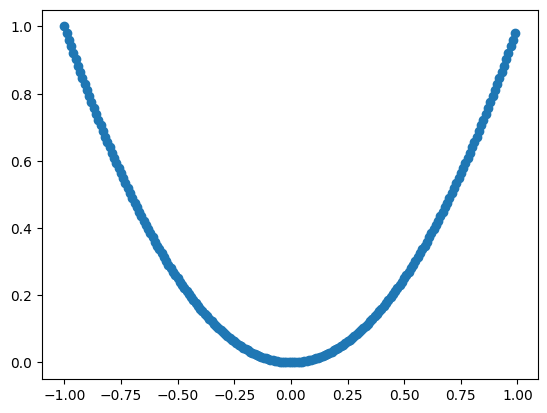

In [2]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x*x

plt.scatter(x,y)

In [3]:
print(x[:5])
print(y[:5])

[-1.   -0.99 -0.98 -0.97 -0.96]
[1.     0.9801 0.9604 0.9409 0.9216]


## 최소 딥러닝 코드

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


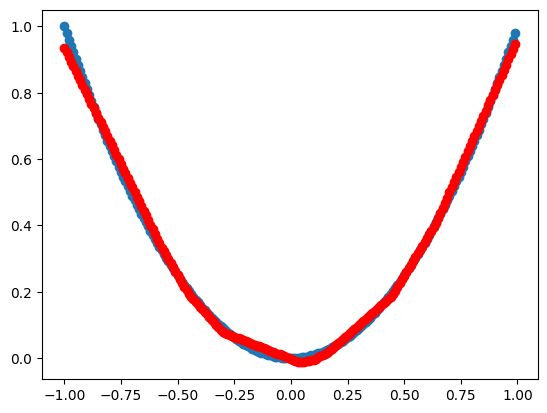

In [4]:
# 모델 정의
model = Sequential()
model.add(Input((1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 학습 위한 설정 : 모델 + optimizer + loss
model.compile(optimizer="Adam", loss="MSE")


# 학습
model.fit(x, y, epochs=100, verbose=0)


# 예측
y_ = model.predict(x)


# 결과를 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# 회귀 작업

회귀(regression) 작업 : 어떤 숫자를 예측하는 작업. 예를 들면, 몸무게를 예측

In [64]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target


In [65]:
print(len(x))
print(x[0])

442
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076 -0.04340085 -0.00259226  0.01990749
 -0.01764613]


In [66]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [67]:
print(len(y))
print(y[:5])

442
[151.  75. 141. 206. 135.]


In [68]:
y = (y - y.min()) / (y.max() - y.min())
print(y[:5])

[0.39252336 0.15576324 0.36137072 0.56386293 0.34267913]


In [69]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

전체 데이터를 8:2로 학습 데이터와, 학습 이후의 검증 데이터로 나눈다.

In [70]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:

# 모델 정의
model = Sequential()
model.add(Input((10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer="Adam", loss="MSE")

# 모델 학습
model.fit(train_x,train_y, epochs=200, validation_data=(test_x, test_y))

Epoch 1/200


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0660 - val_loss: 0.0581
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0600 - val_loss: 0.0513
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520 - val_loss: 0.0445
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0492 - val_loss: 0.0386
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0415 - val_loss: 0.0351
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376 - val_loss: 0.0317
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 - val_loss: 0.0299
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - val_loss: 0.0289
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - val_loss: 0.0287
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - val_loss: 0.0279
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0300 - val_loss: 0.0273
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291 - val_l

In [72]:

# 모델 평가
loss = model.evaluate(test_x, test_y)
print('Test MSE:', loss)

# 예측
pred_y = model.predict(test_x)
pred_y = pred_y.flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 
Test MSE: 0.025047624483704567
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [73]:
print(test_y[:5])
print(pred_y[:5])

[0.60436137 0.14018692 0.55140187 0.63862928 0.26791277]
[0.35159278 0.46898022 0.38445675 0.77758044 0.27116674]


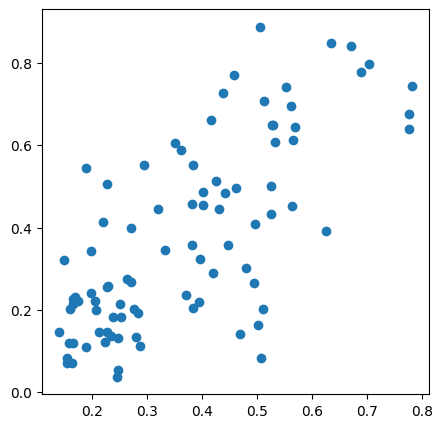

In [74]:
plt.figure(figsize=(5,5))
plt.scatter(test_y, pred_y)
plt.show()

딥러닝의 역할

입력값들로 출력값 자체를 예측한다.

```
['age', 'sex', 'bmi', 'bp',  's1',  's2',   's3',  's4',   's5', 's6'  ] -> 당뇨병 수치
[ 0.038  0.050  0.061  0.021 -0.044  -0.034 -0.043 -0.002  0.019 -0.017] -> 0.356
```

# 분류 작업

분류 작업(classification) : 입력을 특정 카테고리로 예측하는 작업. 보통 카테고리는 0, 1, 2, ... 의 숫자로 표현된다.

In [16]:
!wget https://raw.githubusercontent.com/dhrim/2024_ai_workshop/main/material/iris.csv -O iris.csv

--2024-06-28 04:15:27--  https://raw.githubusercontent.com/dhrim/2024_ai_workshop/main/material/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.17K  --.-KB/s    in 0s      

2024-06-28 04:15:27 (45.3 MB/s) - ‘iris.csv’ saved [2218/2218]



In [17]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [18]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [19]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [20]:
print(x[:5])
print(y[:5])

[[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]]
[[2.]
 [1.]
 [2.]
 [0.]
 [0.]]


In [21]:
model = keras.Sequential()
model.add(Input((4,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=100)


Epoch 1/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6888 - loss: 1.1119  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 1.0824 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 1.0377 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 1.0237 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 0.9904 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - loss: 0.9571 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.9624 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - loss: 0.9572 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - loss: 0.9366 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - loss: 0.9285 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - loss: 0.9149 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.9065 


In [22]:
loss, acc = model.evaluate(test_x, test_y)
print("accuracy=", acc)
              

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.2166

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.2166
accuracy= 1.0


딥러닝의 역할

입력값들로 출력값(카테고리)를 예측한다.

```
['sepal length', 'seppal width', 'petal length', 'petal width'  ] -> 붓꽃 품종
[6.4             2.8             5.6             2.2]             -> 0(Setosa)
```

# 이미지의 이해

In [23]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5


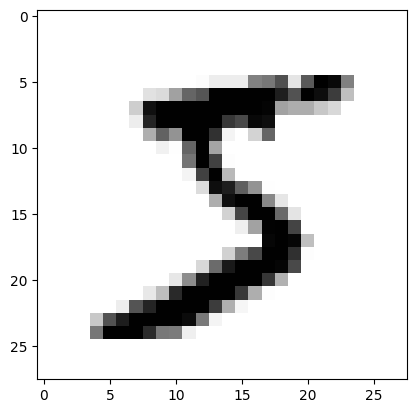

In [26]:
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

In [24]:
np.set_printoptions(linewidth=4*29)
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

5


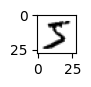

In [30]:
plt.figure(figsize=(0.5, 0.5))
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

# 흑백 이미지 분류

입력 : 0-9의 10개 숫자의 흑백영상에 해당하는 가로 28, 세로 28의 2차원 행렬 숫자

출력 : 0~9의 10개 카테고리 인덱스

In [33]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255.
test_x = test_x/255.


model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=5)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.6952 - loss: 0.9614
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9127 - loss: 0.3064
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.9222 - loss: 0.2661
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9298 - loss: 0.2454
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9363 - loss: 0.2236
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9193 - loss: 0.2833
loss= 0.25038787722587585
acc= 0.929099977016449
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
[7 2 1 ... 4 5 6]


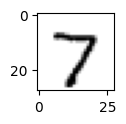

predicted as 7


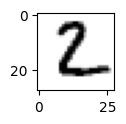

predicted as 2


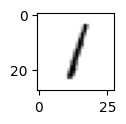

predicted as 1


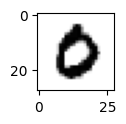

predicted as 0


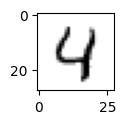

predicted as 4


In [37]:
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(test_x[i], cmap=plt.cm.binary)
  plt.show()
  print("predicted as", predicted[i])


# 컬러 이미지 분류

입력 : 10개 카테고리에 대상의 컬러 영상에 해당하는 가로 32, 세로 32, 깊이 3(R,G,B)의 3차원 행렬 숫자

출력 : 0~9의 10개 카테고리 인덱스

In [39]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

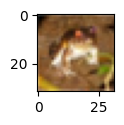

In [44]:

plt.figure(figsize=(1,1))
plt.imshow(raw_train_x[0])
plt.show()


In [40]:
print(raw_train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [47]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape


model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.2313 - loss: 2.0724
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.4692 - loss: 1.4735
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.5339 - loss: 1.2956
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5788 - loss: 1.1813
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5980 - loss: 1.1182
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6003 - loss: 1.1273
loss= 1.1401896476745605
acc= 0.6000000238418579
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[3 8 8 ... 5 1 7]


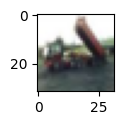

predicted as 9 truck


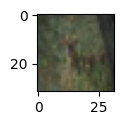

predicted as 4 deer


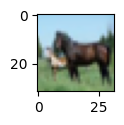

predicted as 7 horse


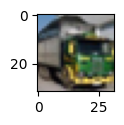

predicted as 9 truck


In [49]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  plt.figure(figsize=(1,1))
  plt.imshow(raw_train_x[i])
  plt.show()
  print("predicted as", raw_train_y[i][0], labels[raw_train_y[i][0]])

for i in [2, 10, 12, 14]:
  show_sample(i)

# 컬러 영상 회귀

입력 : 집의 컬러 영상에 해당하는 가로 32, 세로 32, 깊이 3(R,G,B)의 3차원 행렬 숫자

출력 : 0.0~1.0으로 치환된 집값

In [50]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 59.04 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [94]:
import argparse
import locale
import os
import glob
import cv2


In [109]:
def load_house_images(df, inputPath):
	images = []
	for i in df.index.values:
		basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
		housePaths = sorted(list(glob.glob(basePath)))

		inputImages = []
		outputImage = np.zeros((64*4, 64*4, 3), dtype="uint8")

		for housePath in housePaths:
			image = cv2.imread(housePath)
			image = cv2.resize(image, (32*4, 32*4))
			inputImages.append(image)

		outputImage[0:32*4, 0:32*4] = inputImages[0]
		outputImage[0:32*4, 32*4:64*4] = inputImages[1]
		outputImage[32*4:64*4, 32*4:64*4] = inputImages[2]
		outputImage[32*4:64*4, 0:32*4] = inputImages[3]
		images.append(outputImage)

	return np.array(images)                

In [132]:
images = load_house_images(df, "Houses-dataset/Houses Dataset")
images = images / 255.0



In [133]:
print(len(images))

535


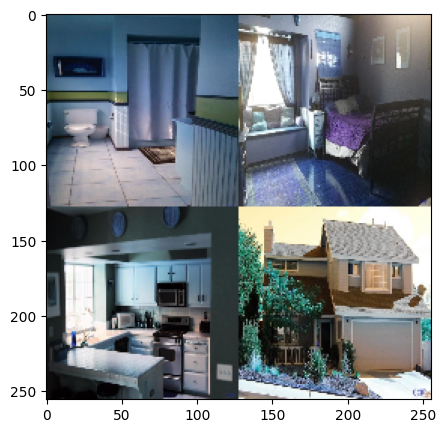

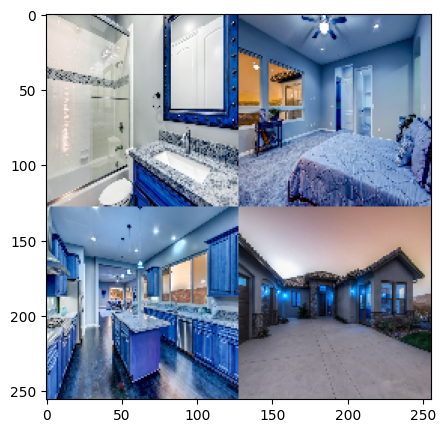

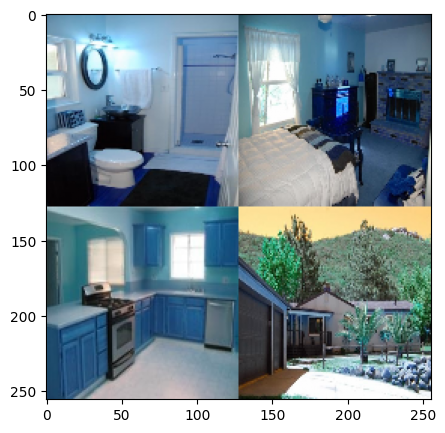

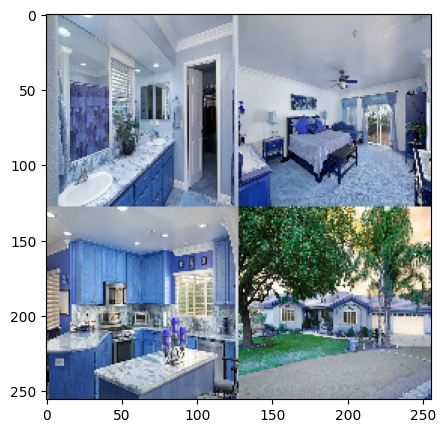

In [117]:
def show_sample(i):
  plt.figure(figsize=(5,5))
  plt.imshow(images[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [164]:
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
house_info_df = pd.read_csv("Houses-dataset/Houses Dataset/HousesInfo.txt", sep=" ", header=None, names=cols)
house_info_df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [165]:
print(len(house_info_df))

535


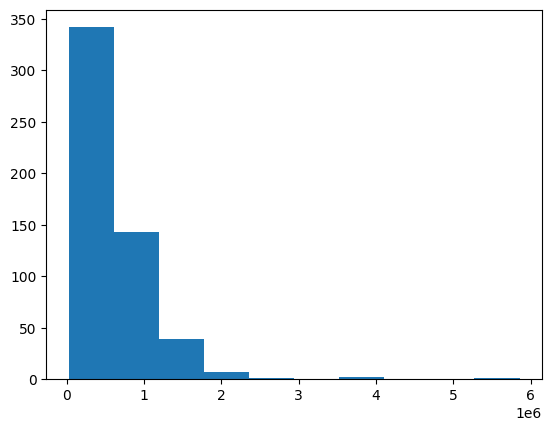

In [166]:
plt.hist(house_info_df['price'])
plt.show()

In [167]:
house_info_df['price'] = house_info_df['price'].apply(lambda x: 1000000 if x > 1000000 else x)

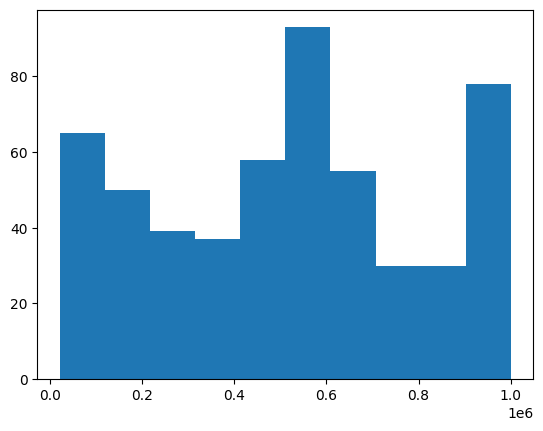

In [168]:
plt.hist(house_info_df['price'])
plt.show()

In [169]:
y = house_info_df['price'].values
y = (y - y.min()) / (y.max() - y.min())

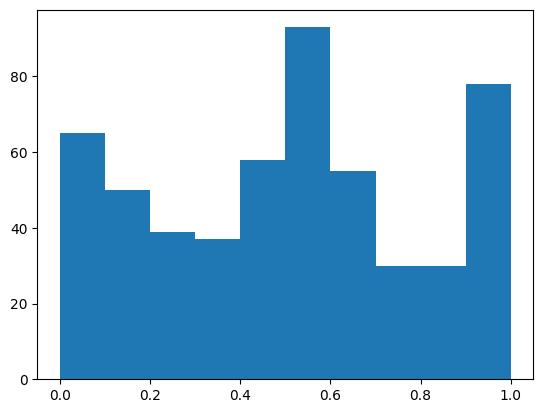

In [170]:
plt.hist(y)
plt.show()

In [171]:
train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.25, random_state=42)

In [182]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape


model = keras.Sequential()
model.add(Input((64*4,64*4,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="MSE", metrics=["mse"])

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("MSE =",mse)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - loss: 0.1325 - mse: 0.1325
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 0.1155 - mse: 0.1155
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 0.0938 - mse: 0.0938
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 0.0916 - mse: 0.0916
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.0911 - mse: 0.0911
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - loss: 0.0877 - mse: 0.0877
loss= 0.08769387006759644
MSE = 0.08769387006759644


In [183]:
predicted = model.predict(test_x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step


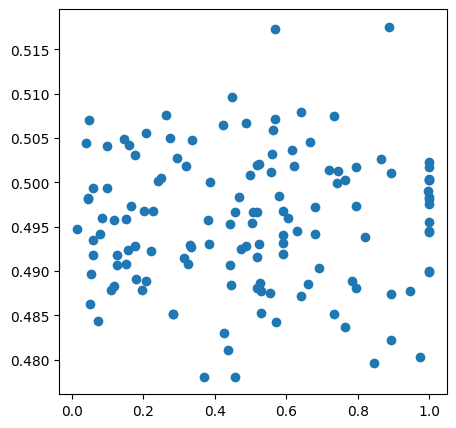

In [184]:
plt.figure(figsize=(5,5))
plt.scatter(test_y, predicted)
plt.show()

In [186]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521,777 (1.99 MB)

 Trainable params: 173,925 (679.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,852 (1.33 MB)